In [1]:
# Importing Required Libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Collect data

data_dir = "C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/"
train_path = "C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey"
test_path= "C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/test_grey"
validate_path= "C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/validate_grey"


# Resizing the images to 30x30x3

height = 30
width = 30
channels = 1
total_classes= 36



data = []
labels = []
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES


36

C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/0/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/1/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/2/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/3/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/4/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/5/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/6/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/7/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/8/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/9/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/10/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/11/
C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/12/
C:/Users/15199/Desktop

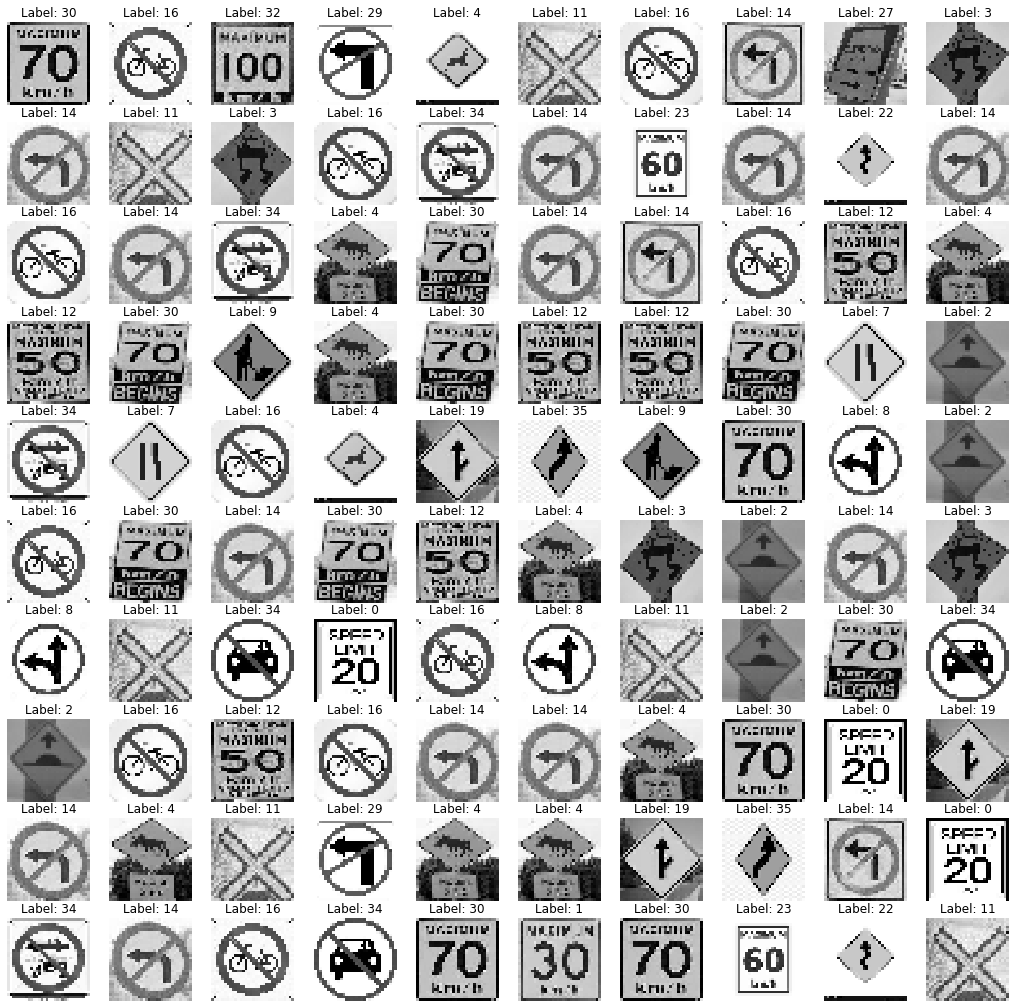

In [3]:
# Reading the input images and putting them into a numpy array

data=[]
labels=[]

height = 30
width = 30
channels = 1
classes = 36
n_inputs = height * width*channels
for i in range(classes) :
    path = "C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey/{0}/".format(i)
    print(path)
    Class=os.listdir(path)
    for a in Class:
        try:
            image=cv2.imread(path+a)
            image_from_array = Image.fromarray(image, 'RGB')
            size_image = image_from_array.resize((height, width))
            data.append(np.array(size_image))
            labels.append(i)
        except AttributeError:
            print(" ")
            
Cells=np.array(data)
labels=np.array(labels)

#Randomize the order of the input images
s=np.arange(Cells.shape[0])
np.random.seed(36)
np.random.shuffle(s)
Cells=Cells[s]
labels=labels[s]



d = dict()
class_labels = dict()
# input image dimensions
img_rows, img_cols = 32, 32
# The images are RGB.
img_channels = 1
nb_classes = len(class_labels.keys())

datagen = ImageDataGenerator()
data = datagen.flow_from_directory('C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/train_grey',
                                    target_size=(32, 32),
                                    batch_size=32,
                                    class_mode='categorical',
                                    shuffle=True )
X , y = data.next()
# Labels are one hot encoded
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

fig, axes = plt.subplots(10,10, figsize=(18,18))
for i,ax in enumerate(axes.flat):
    r = np.random.randint(X.shape[0])
    ax.imshow(X[r].astype('uint8'))
    ax.grid(False)
    ax.axis('off')
    ax.set_title('Label: '+str(np.argmax(y[r])))

### Sample images of the dataset

In [4]:
(X_train,X_val)=Cells[(int)(0.2*len(labels)):],Cells[:(int)(0.2*len(labels))]
X_train1 = X_train.astype('float32')/255 
X_val1 = X_val.astype('float32')/255
(y_train,y_val)=labels[(int)(0.2*len(labels)):],labels[:(int)(0.2*len(labels))]

#Using one hote encoding for the train and validation labels
from tensorflow.keras.utils import to_categorical
y_train1 = to_categorical(y_train, 36)
y_val1 = to_categorical(y_val, 36)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 128)         0

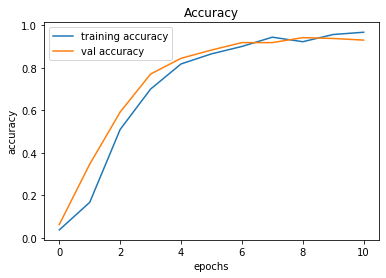

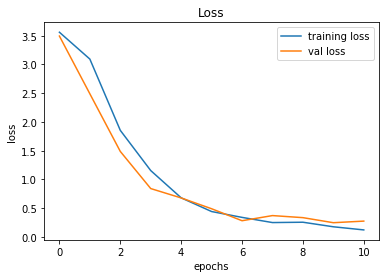

In [5]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu', input_shape=(X_train.shape[1:])),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(36, activation='softmax')
])

model.summary()

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


epochs = 11
history = model.fit(X_train1, y_train1, batch_size=32, epochs=epochs,
validation_data=(X_val1, y_val1))



plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()


# Saving the model
model.save('TSC_model1.h5')

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        896       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)         

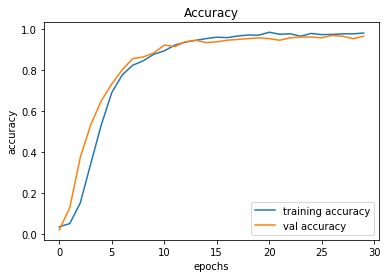

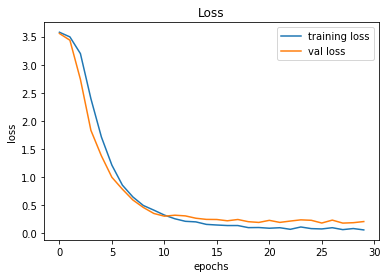

In [6]:
# Building model

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(height,width,3)))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()


# Compiling model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



# Augmenting the data to get high accuracy

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")


batch_size = 100
epochs = 30

history = model.fit(X_train1, y_train1, batch_size=batch_size, epochs=epochs,
validation_data=(X_val1, y_val1))


plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Saving the model
model.save('TSC_model2.h5')


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 64)        4864      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 128)       36992     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 64)          73792     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)         

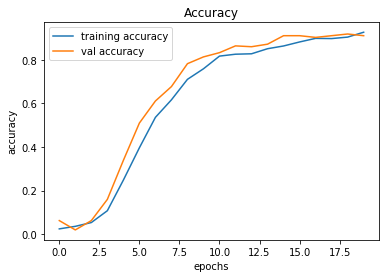

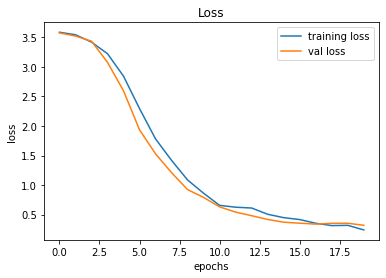

In [7]:
model = keras.models.Sequential([    
    keras.layers.Conv2D(filters=64, kernel_size=(5,5), activation='relu', input_shape=(X_train.shape[1:])),
    keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(36, activation='softmax')
])

model.summary()

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 20
history = model.fit(X_train1, y_train1, batch_size=64, epochs=epochs,
validation_data=(X_val1, y_val1))

plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Saving the model
model.save('TSC_model3.h5')



In [17]:
#Predicting with the test data
y_test=pd.read_csv("C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/test.csv")
labels=y_test['Path'].values
y_test=y_test['ClassId'].values

data=[]

for f in labels:
    image=cv2.imread('C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/test_grey'+f.replace('Test/', ''))
    #image_from_array = Image.fromarray(image)
    size_image = image_from_array.resize((height, width))
    data.append(np.array(size_image))

X_test=np.array(data)
X_test = X_test.astype('float32')/255 
pred = model.predict_classes(X_test)

#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)



y_test=pd.read_csv("C:/Users/15199/Desktop/semester4/capstone final/traffic_sign/test.csv")
y_test = y_test.drop(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2'], axis=1)
y_test.head()


test_img_paths = ['C:/Users/15199/Desktop/semester4/capstone final/traffic_sign' + path for path in y_test['Path']]
test_img_paths[:10]


predictions = model.predict(X_test, verbose=1)

unique_signs = np.unique(labels)
len(unique_signs)

def get_pred_label(prediction_probabilities):
    """
    Turns an array of prediction probabilities into a label.
    """
    return unique_signs[np.argmax(prediction_probabilities)]

# Turning probabilities to labels
pred_labels = []
for i in predictions:
    pred_labels.append(get_pred_label(i))
pred_labels[:10]


len(labels)




10/10 [==============================] - 0s 10ms/step


291

### ResNet50

In [45]:
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
resnet = ResNet50(weights= None, include_top=False, input_shape= (img_rows,img_cols,img_channels))

In [46]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(nb_classes, activation= 'softmax')(x)
model = Model(inputs = resnet.input, outputs = predictions)

In [47]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 16, 16, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [53]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [54]:
model_check = ModelCheckpoint('best_model.h5', monitor='val_accuracy', verbose=0, save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=5, verbose=0, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

csv_logger = CSVLogger('train_log.csv', separator=',')

In [57]:
n_epochs = 50
history =  model.fit(X_train1, y_train1,  batch_size = 32, epochs = n_epochs, verbose = 1, 
              validation_data = (X_val1, y_val1), callbacks = [model_check, early, reduce_lr, csv_logger])

Epoch 1/50
33/33 [==============================] - 5s 118ms/step - loss: 0.3388 - accuracy: 0.8969 - val_loss: 0.3985 - val_accuracy: 0.8988
Epoch 2/50
33/33 [==============================] - 3s 105ms/step - loss: 0.3384 - accuracy: 0.9214 - val_loss: 0.2703 - val_accuracy: 0.9183
Epoch 3/50
33/33 [==============================] - 4s 107ms/step - loss: 0.2733 - accuracy: 0.9240 - val_loss: 0.2795 - val_accuracy: 0.9144
Epoch 4/50
33/33 [==============================] - 4s 108ms/step - loss: 0.2610 - accuracy: 0.9195 - val_loss: 0.2901 - val_accuracy: 0.9339
Epoch 5/50
33/33 [==============================] - 3s 105ms/step - loss: 0.2515 - accuracy: 0.9208 - val_loss: 0.2653 - val_accuracy: 0.9183
Epoch 6/50
33/33 [==============================] - 3s 103ms/step - loss: 0.1950 - accuracy: 0.9318 - val_loss: 0.3595 - val_accuracy: 0.9105
Epoch 7/50
33/33 [==============================] - 3s 105ms/step - loss: 0.1658 - accuracy: 0.9488 - val_loss: 0.2323 - val_accuracy: 0.9494
Epoch 

In [74]:
# Saving the model
model.save('TSC_model.h5')

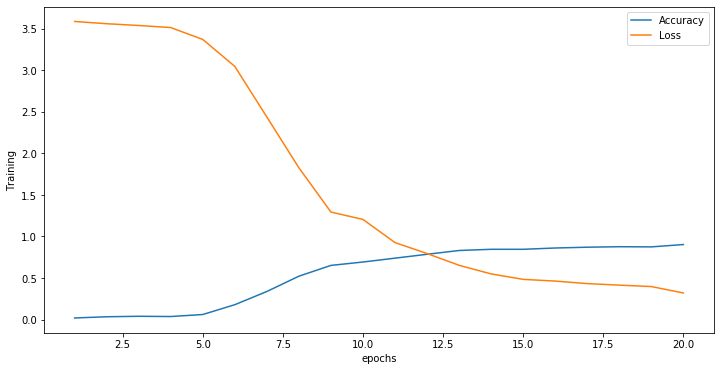

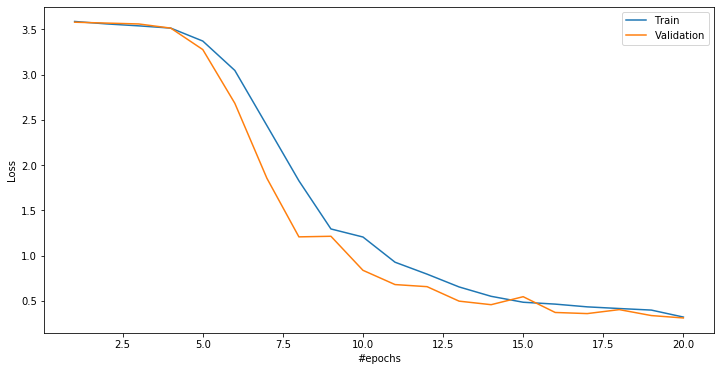

In [75]:
import seaborn as sns
q = len(list(history.history['loss']))
plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['accuracy'], label = 'Accuracy')
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Loss')
plt.xlabel('epochs')
plt.ylabel('Training')
plt.legend();


plt.figure(figsize=(12, 6))
sns.lineplot(x = range(1, 1+q), y = history.history['loss'], label = 'Train')
sns.lineplot(x = range(1, 1+q), y = history.history['val_loss'], label = 'Validation')
plt.xlabel('#epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
# Libraries
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
from tensorflow.keras.models import load_model

# Load your model
model = load_model('TSC_model1.h5') # Path to your model
# Dictionary to label all traffic signs class.
classes = { 1:'Speed limit 20kmh',
            2:'Speed limit 30kmh', 
            3:'Speed limit 50kmh', 
            4:'Speed limit 60kmh', 
            5:'Speed limit 70kmh', 
            6:'Speed limit 80kmh', 
            7:'speed limit 100kmh', 
            8:'Stop', 
            9:'No vehicles', 
            10:'Double curve', 
            11:'Bumpy road', 
            12:'Slippery road', 
            13:'Wild animals crossing', 
            14:'Keep right', 
            15:'Round about mandatory', 
            16:'Right Lane ends ahead', 
            17:'Road Forks to the Left', 
            18:'Road Work Ahead', 
            19:'End of no passing', 
            20:'Railway Crossing Sign', 
            21:'Do not stop in the area between the signs', 
            22:'Do not turn left at the intersection', 
            23:'Do not turn to go in the opposite direction. No U-turn', 
            24:'No bicycles allowed on this road', 
            25:'No pedestrians allowed on this road', 
            26:'Narrow bridge ahead', 
            27:'Road branching off ahead', 
            28:'Pavement narrows ahead', 
            29:'Chevron (arrowhead) signs', 
            30:'Winding road ahead', 
            31:'Yield',
            32:'Notruck entry', 
            33:'speed limit 40km',
            34:'detour', 
            35:'fire route', 
            36:'no left turn'}




# Initialise GUI
top=tk.Tk()
# Window dimensions (800x600)
top.geometry('800x600')
# Window title
top.title('Traffic sign classification')
# Window background color
top.configure(background='#F9E6E0')
# Window label
label=Label(top,background='#F9E6E0', font=('arial',15,'bold'))
# Sign image
sign_image = Label(top)


# Function to classify image
def classify(file_path):
    global label_packed
    # Open the image file path
    image = Image.open(file_path)
    # Resize the image
    image = image.resize((30,30))
    # Inserts a new axis that will appear at the axis position in the expanded array shape
    image = numpy.expand_dims(image, axis=0)
    # Convert to numpy array
    image = numpy.array(image)
    # Make prediction
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 
    
# Function to show the "classify" button
def show_classify_button(file_path):
    # Create the button
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    # Configure button colors
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    # Configure button place (location)
    classify_b.place(relx=0.79,rely=0.46)
    
# Function to upload image
def upload_image():
    try:
        # Path of the image
        file_path=filedialog.askopenfilename()
        # Open file path
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass
    
# Create "Upload" button
upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
# "Upload" button colors and font
upload.configure(background='#364156', foreground='white',font=('arial underline',10,'bold'))
# Button location
upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
# Window title text
heading = Label(top, text="Know Your Traffic Sign",pady=20, font=('arial',20,'bold'))
# Window colors
heading.configure(background='#F9E6E0',foreground='#364156')
heading.pack()
top.mainloop()


C:\Users\15199\Anaconda3\envs\DAB200\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Chevron (arrowhead) signs
Speed limit 30kmh
no left turn
fire route
